# Midterm Project: Heart Disease Classification Analysis
**Author:** Kellie Leopold  
**Date:** November 11, 2025  
**Objective:** The objective is to predict the risk of heart disease based on the dataset.


## Introduction
Heart disease is one of the leading causes of death worldwide. Early detection and risk prediction can help healthcare providers take preventive measures and improve patient outcomes. In this project, we use the UCI Heart Disease dataset to analyze patient data and build a classification model that predicts the risk of heart disease based on various health indicators such as age, blood pressure, cholesterol levels, and lifestyle factors.

Our objective is to apply machine learning classification techniques to:  
* Explore and understand the dataset.
* Prepare and preprocess the data for modeling.
* Train and evaluate classification models to predict heart disease risk.
* Compare different classifiers and interpret their performance.

Through this analysis, we aim to demonstrate how predictive modeling can support clinical decision-making and identify the most influential factors contributing to heart disease risk.

## Imports
Import the necessary Python libraries for this notebook.  

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix


from matplotlib.colors import ListedColormap

## Section 1. Load and Explore the Data
Load the UCI Heart Disease Dataset and explore the data.

In [439]:
# Load UCI Heart Disease dataset directly into a DataFrame
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    names=column_names,
    na_values='?'
)

# Save a local copy in the notebook's data folder
data.to_csv('data/heart_disease.csv', index=False)

# Display the first 10 rows to verify the data
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [440]:
# Check for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [441]:
# Display summary statistics
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

##Reflection 1:##

What do you notice about the dataset? Any data issues?

* The dataset has 303 records and 14 features, which feels like a decent size for building a classification model.

* There are just a few missing values (ca has 4 missing, thal has 2), so nothing major to worry about.

* The features are a mix of numbers (like age, blood pressure, cholesterol, max heart rate) and categories (like sex, chest pain type, fasting blood sugar, etc.).

* The target column isn’t perfectly clean because it has multiple values (0, 1, 2, 3, 4), but for this project, we’re simplifying it to binary: 0 = no significant heart disease, 1 = heart disease present.

* Overall, the dataset looks pretty clean, and the small number of missing values can easily be handled without losing much information.

## Section 2. Data Exploration and Preparation
This section explores the dataset with charts and handles missing values

### 2.1 Explore Data Patterns and Distributions

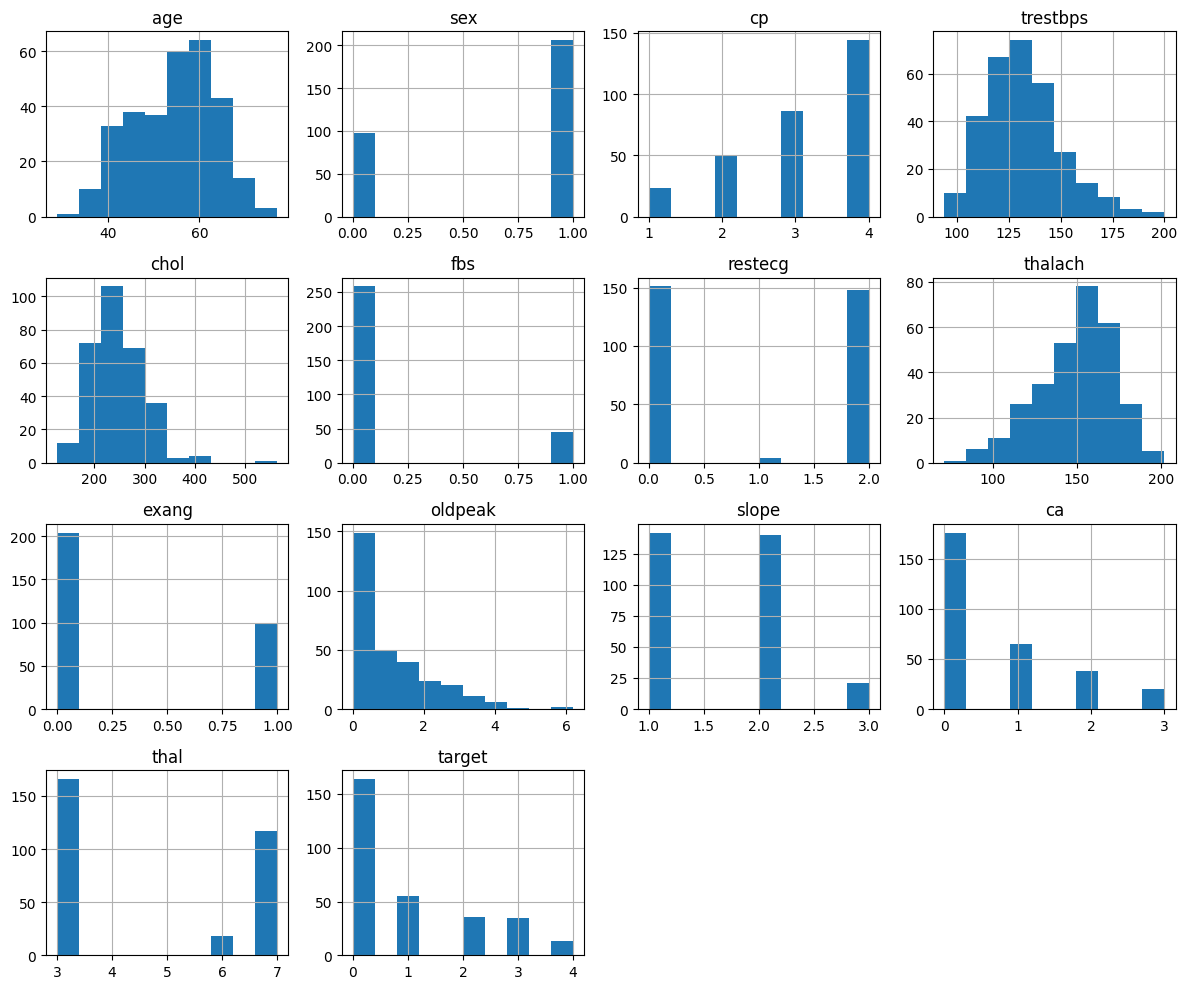

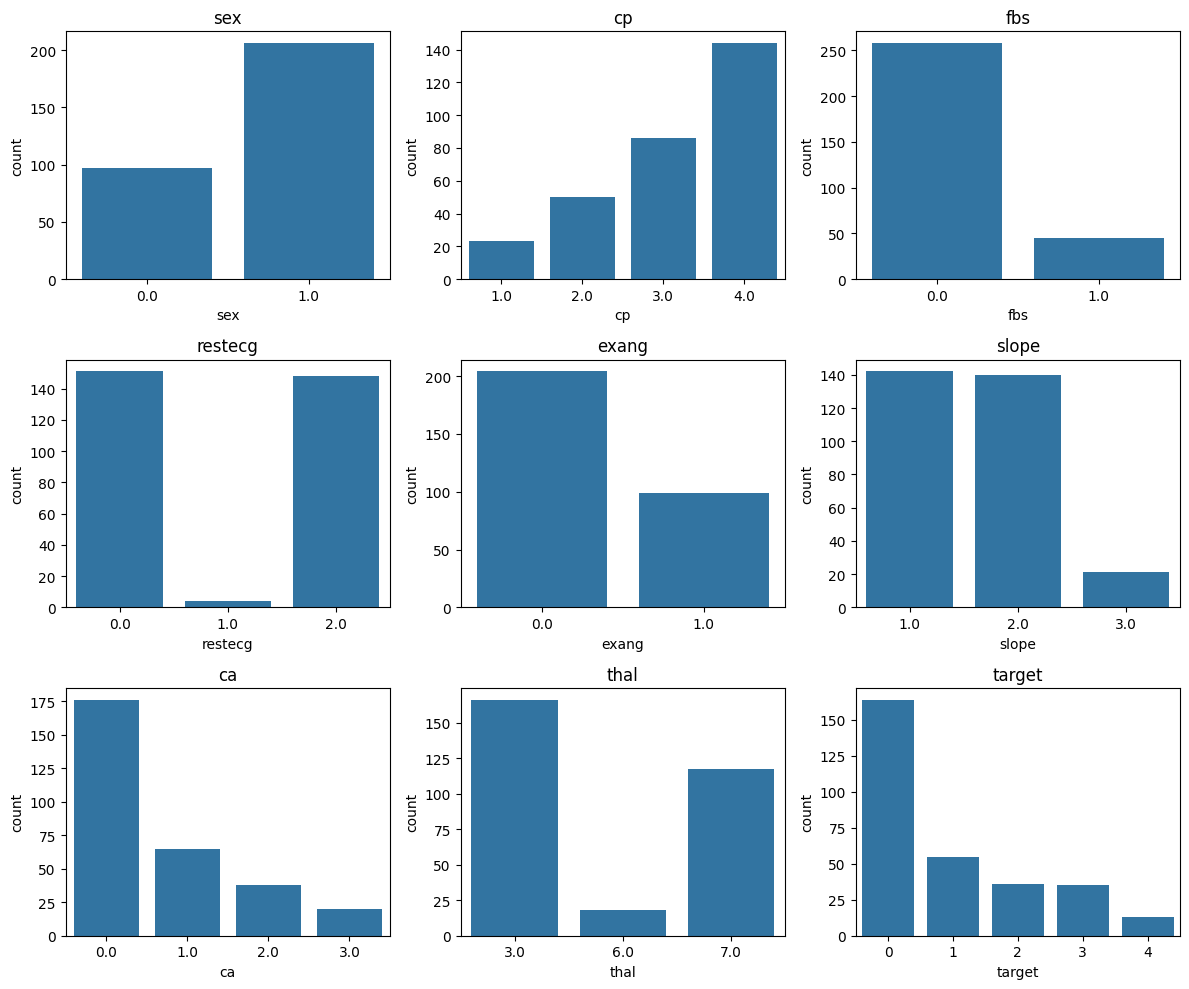

In [442]:
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3x3 grid
for ax, col in zip(axes.flatten(), categorical_features):
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### 2.2 Handle Missing Values

In [443]:
# Ensure 'ca' and 'thal' are numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Fill missing values with median
data = data.copy()
data['ca'] = data['ca'].fillna(data['ca'].median())
data['thal'] = data['thal'].fillna(data['thal'].median())

# Verify no missing values remain
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 2.3 Feature Engineering

In [444]:
# Map 'sex' to meaningful labels (already numeric: 1 = male, 0 = female)
data['sex_label'] = data['sex'].map({1: 'male', 0: 'female'})

# Create age groups: young (<40), middle-aged (40-60), senior (>60)
data['age_group'] = pd.cut(
    data['age'], bins=[0, 40, 60, 120], labels=['young', 'middle', 'senior']
)

# Create blood pressure level feature using resting blood pressure (trestbps)
data['bp_level'] = pd.cut(
    data['trestbps'],
    bins=[0, 120, 140, 200],
    labels=['normal', 'elevated', 'high']
)

# Convert categorical features to numeric labels for modeling
data['age_group_label'] = data['age_group'].map({'young': 0, 'middle': 1, 'senior': 2})
data['bp_level_label'] = data['bp_level'].map({'normal': 0, 'elevated': 1, 'high': 2})

# Define feature cases
X_case1 = data[['age_group_label']].dropna()
y_case1 = data.loc[X_case1.index, 'target']

X_case2 = data[['bp_level_label']].dropna()
y_case2 = data.loc[X_case2.index, 'target']

X_case3 = data[['sex']].dropna()  # numeric: 1 = male, 0 = female
y_case3 = data.loc[X_case3.index, 'target']

# Display updated feature matrix shapes
print("\nFeature matrix shapes:")
print(f"X_case1: {X_case1.shape}, y_case1: {y_case1.shape}")
print(f"X_case2: {X_case2.shape}, y_case2: {y_case2.shape}")
print(f"X_case3: {X_case3.shape}, y_case3: {y_case3.shape}")

# Display first few rows to verify
data[['age', 'age_group', 'age_group_label', 'trestbps', 'bp_level', 'bp_level_label', 'sex', 'sex_label']].head(10)


Feature matrix shapes:
X_case1: (303, 1), y_case1: (303,)
X_case2: (303, 1), y_case2: (303,)
X_case3: (303, 1), y_case3: (303,)


,age,age_group,age_group_label,trestbps,bp_level,bp_level_label,sex,sex_label
0,63.0,senior,2,145.0,high,2,1.0,male
1,67.0,senior,2,160.0,high,2,1.0,male
2,67.0,senior,2,120.0,normal,0,1.0,male
3,37.0,young,0,130.0,elevated,1,1.0,male
4,41.0,middle,1,130.0,elevated,1,0.0,female
5,56.0,middle,1,120.0,normal,0,1.0,male
6,62.0,senior,2,140.0,elevated,1,0.0,female
7,57.0,middle,1,120.0,normal,0,0.0,female
8,63.0,senior,2,130.0,elevated,1,1.0,male
9,53.0,middle,1,140.0,elevated,1,1.0,male


**Reflection 2**

Patterns and observations:
* Most patients are between 40 and 70 years old, and heart disease seems to be more common in the older age brackets.
* Cholesterol levels vary a lot, ranging from 126 to 564 mg/dl, which suggests different levels of risk among patients.
* Resting blood pressure and age seem related to heart disease risk, with higher blood pressure more common in patients with heart disease.
* Sex distribution is skewed toward males, which might affect the patterns we see in other features.

Essential preprocessing steps:
* Missing values: Only a few (ca and thal), so we filled them with the median—minimal data loss.
* Target variable: Converted from multi-class (0–4) to binary (0 = no significant heart disease, 1 = heart disease present).

Feature engineering:
* Created age groups (young, middle, senior) to capture patterns in risk by age brackets.
* Created blood pressure levels (normal, elevated, high) to make risk patterns more interpretable.
* Mapped sex from numeric to categorical labels (female/male).

How this helps modeling:
* Binning age and blood pressure makes it easier for models to capture non-linear relationships.
* These engineered features improve interpretability and allow models to better understand meaningful risk patterns.

## Section 3. Feature Selection and Justification

In this section, we define the input features (predictors) and the target variable for our heart disease classification analysis.  
The target variable is `target`, which indicates the presence or absence of heart disease (0 = <50% narrowing, 1 = >50% narrowing).  

We will explore different input features individually to understand their predictive power.  
For modeling, categorical features (`age_group` and `bp_level`) are converted to numeric labels to ensure compatibility with machine learning classifiers.  

### 3.1 Choose Features and Target

In [445]:
# Define all features for reference
features = ['age_group_label', 'bp_level_label', 'chol']
target = 'target'  # The column representing heart disease

### 3.2 Define X (features) and y (target)

In [446]:
# Case 1: Feature = age_group_label
X_case1 = data[['age_group_label']]
y_case1 = data['target']

# Case 2: Feature = bp_level_label
X_case2 = data[['bp_level_label']]
y_case2 = data['target']

# Case 3: Feature = chol
X_case3 = data[['chol']]
y_case3 = data['target']

**Reflection 3:**

* Age Group (Case 1):
    Age is a well-known risk factor for heart disease. By grouping age into categories (young, middle, senior), the model can detect non-linear patterns in risk that might be missed if age were used as a continuous variable.

* Blood Pressure Level (Case 2):
    High blood pressure is strongly associated with heart disease. Categorizing resting blood pressure into levels (normal, elevated, high) allows the model to recognize different risk thresholds and aligns with medical understanding of hypertension-related risks.

* Cholesterol (Case 3):
    Cholesterol is a key indicator of cardiovascular health. Using the raw numeric values, the model can capture direct relationships between cholesterol levels and disease risk, and it complements the categorical features to provide a balanced perspective on patient risk.

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data  

Split the data into training and test sets.

In [447]:
# Convert multi-class target (0–4) to binary: 0 = no disease, 1 = disease
data['target_binary'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

# Redefine targets for each case
y_case1 = data.loc[X_case1.index, 'target_binary']
y_case2 = data.loc[X_case2.index, 'target_binary']
y_case3 = data.loc[X_case3.index, 'target_binary']

# Split data into training and test sets (80/20) for each case
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Case 1
for train_idx, test_idx in splitter.split(X_case1, y_case1):
    X_train_case1, X_test_case1 = X_case1.iloc[train_idx], X_case1.iloc[test_idx]
    y_train_case1, y_test_case1 = y_case1.iloc[train_idx], y_case1.iloc[test_idx]

# Case 2
for train_idx, test_idx in splitter.split(X_case2, y_case2):
    X_train_case2, X_test_case2 = X_case2.iloc[train_idx], X_case2.iloc[test_idx]
    y_train_case2, y_test_case2 = y_case2.iloc[train_idx], y_case2.iloc[test_idx]

# Case 3
for train_idx, test_idx in splitter.split(X_case3, y_case3):
    X_train_case3, X_test_case3 = X_case3.iloc[train_idx], X_case3.iloc[test_idx]
    y_train_case3, y_test_case3 = y_case3.iloc[train_idx], y_case3.iloc[test_idx]

print("Data splitting completed successfully!")
print(f"Case 1 - Training: {X_train_case1.shape}, Test: {X_test_case1.shape}")
print(f"Case 2 - Training: {X_train_case2.shape}, Test: {X_test_case2.shape}")
print(f"Case 3 - Training: {X_train_case3.shape}, Test: {X_test_case3.shape}")

Data splitting completed successfully!
Case 1 - Training: (242, 1), Test: (61, 1)
Case 2 - Training: (242, 1), Test: (61, 1)
Case 3 - Training: (242, 1), Test: (61, 1)


### 4.2 Create and Train Model (Decision Tree) 

Create and train a decision tree model with no random initializer argument.

In [448]:
# Create and train Decision Tree classifiers for all three cases
dt_case1 = DecisionTreeClassifier(random_state=42)
dt_case2 = DecisionTreeClassifier(random_state=42)
dt_case3 = DecisionTreeClassifier(random_state=42)

dt_case1.fit(X_train_case1, y_train_case1)
dt_case2.fit(X_train_case2, y_train_case2)
dt_case3.fit(X_train_case3, y_train_case3)

print("Decision Tree models trained successfully for all three cases!")

Decision Tree models trained successfully for all three cases!


### 4.3 Predict and Evaluate Model Performance  

Predict and evaluate all three cases.

In [449]:

# Predictions
y_pred_case1 = dt_case1.predict(X_test_case1)
y_pred_case2 = dt_case2.predict(X_test_case2)
y_pred_case3 = dt_case3.predict(X_test_case3)

print("\n=== Decision Tree Model Performance ===")

# Case 1
print(f"\nCase 1 (age_group) Results:")
print(f"Accuracy: {accuracy_score(y_test_case1, y_pred_case1):.3f}")
print(classification_report(y_test_case1, y_pred_case1, target_names=['No Disease', 'Disease']))

# Case 2
print(f"\nCase 2 (bp_level) Results:")
print(f"Accuracy: {accuracy_score(y_test_case2, y_pred_case2):.3f}")
print(classification_report(y_test_case2, y_pred_case2, target_names=['No Disease', 'Disease']))

# Case 3
print(f"\nCase 3 (chol) Results:")
print(f"Accuracy: {accuracy_score(y_test_case3, y_pred_case3):.3f}")
print(classification_report(y_test_case3, y_pred_case3, target_names=['No Disease', 'Disease']))


=== Decision Tree Model Performance ===

Case 1 (age_group) Results:
Accuracy: 0.590
              precision    recall  f1-score   support

  No Disease       0.59      0.82      0.68        33
     Disease       0.60      0.32      0.42        28

    accuracy                           0.59        61
   macro avg       0.59      0.57      0.55        61
weighted avg       0.59      0.59      0.56        61


Case 2 (bp_level) Results:
Accuracy: 0.590
              precision    recall  f1-score   support

  No Disease       0.58      0.85      0.69        33
     Disease       0.62      0.29      0.39        28

    accuracy                           0.59        61
   macro avg       0.60      0.57      0.54        61
weighted avg       0.60      0.59      0.55        61


Case 3 (chol) Results:
Accuracy: 0.639
              precision    recall  f1-score   support

  No Disease       0.63      0.79      0.70        33
     Disease       0.65      0.46      0.54        28

    accuracy

### 4.4 Report Confusion Matrix (as a heatmap)  

Plot for all cases.

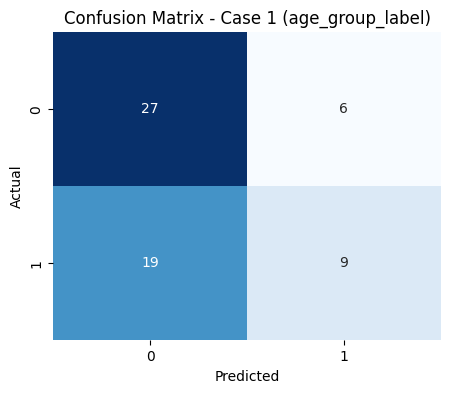

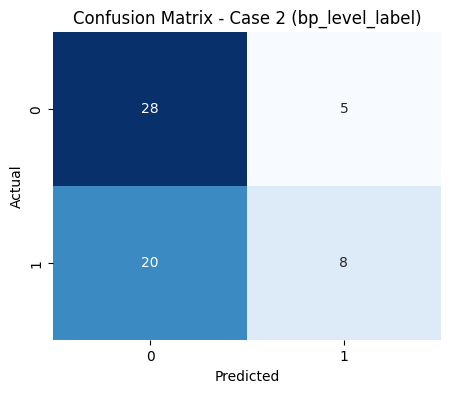

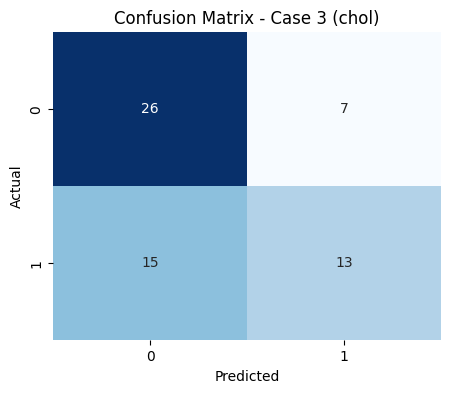

In [450]:
# Function to plot a confusion matrix nicely
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Case 1: age_group_label
plot_confusion(y_test_case1, y_pred_case1, "Confusion Matrix - Case 1 (age_group_label)")

# Case 2: bp_level_label
plot_confusion(y_test_case2, y_pred_case2, "Confusion Matrix - Case 2 (bp_level_label)")

# Case 3: chol
plot_confusion(y_test_case3, y_pred_case3, "Confusion Matrix - Case 3 (chol)")

### 4.5 Report Decision Tree Plot  

Plot the decision tree model for each case. 

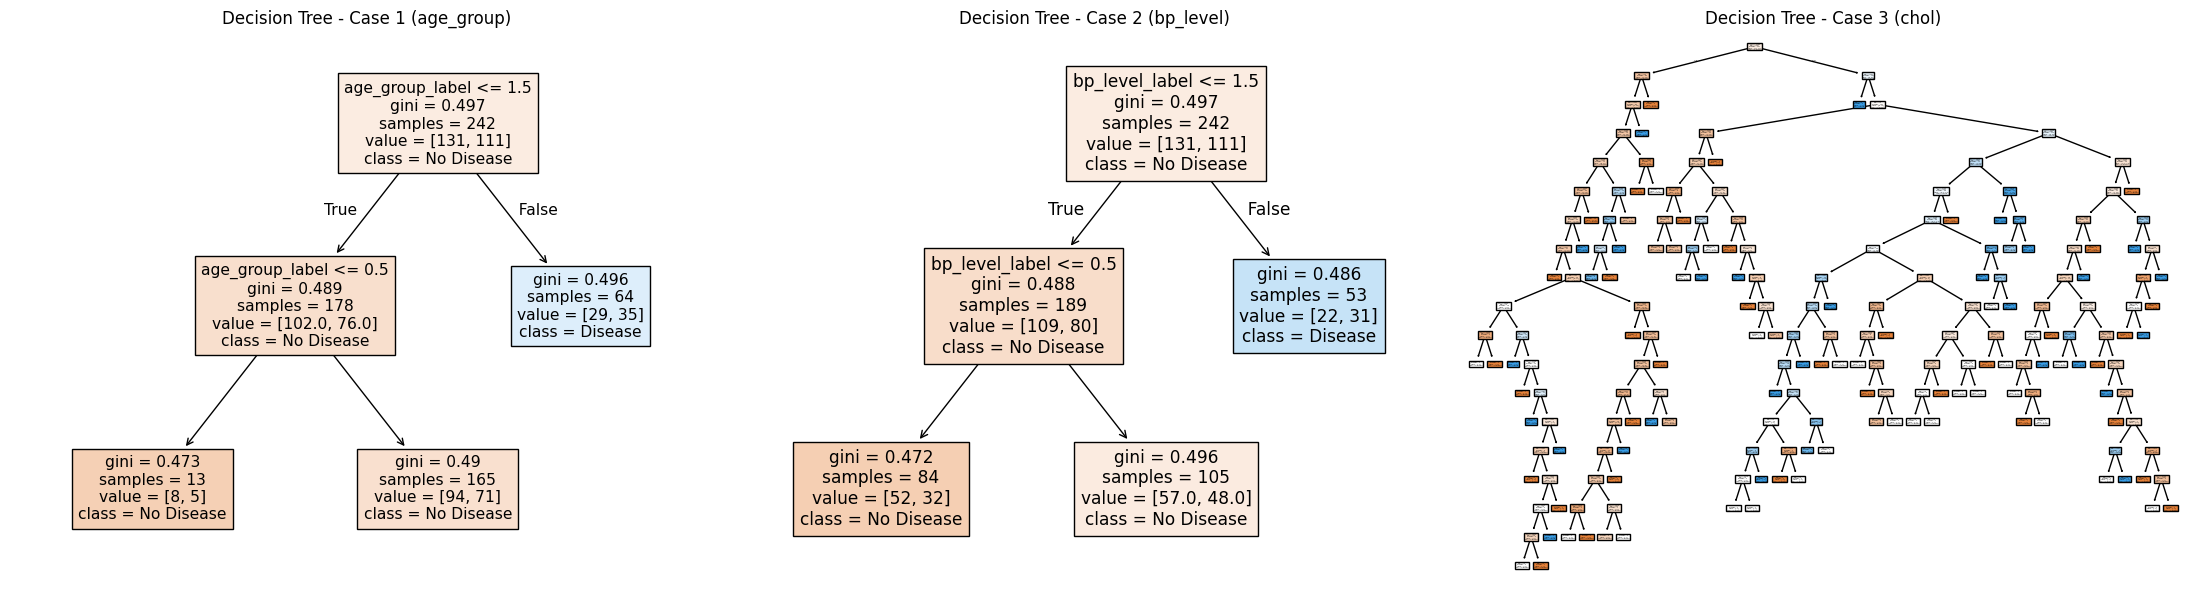

In [451]:
# Visualize the trained Decision Trees for each case
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Case 1: age_group
plot_tree(
    dt_case1,
    filled=True,
    feature_names=X_case1.columns,
    class_names=['No Disease', 'Disease'],
    ax=axes[0]
)
axes[0].set_title("Decision Tree - Case 1 (age_group)")

# Case 2: bp_level
plot_tree(
    dt_case2,
    filled=True,
    feature_names=X_case2.columns,
    class_names=['No Disease', 'Disease'],
    ax=axes[1]
)
axes[1].set_title("Decision Tree - Case 2 (bp_level)")

# Case 3: chol
plot_tree(
    dt_case3,
    filled=True,
    feature_names=X_case3.columns,
    class_names=['No Disease', 'Disease'],
    ax=axes[2]
)
axes[2].set_title("Decision Tree - Case 3 (chol)")

plt.tight_layout()
plt.show()

**Interpretation**  

The Decision Tree models show how each feature affects heart disease risk. The first tree, using age_group, shows that older people are more likely to have heart disease, while younger groups tend to have lower risk. The second tree, based on bp_level, shows that higher blood pressure is linked to a higher chance of heart disease. The third tree, using chol (cholesterol level), suggests that people with higher cholesterol levels are more likely to have heart problems.

Each feature tells part of the story about what might influence someone’s heart health.

**Reflection 4**

Overall, the three models performed differently. Using only age_group didn’t give very strong results because it was too general. The bp_level added a bit more insight since blood pressure is more directly related to heart issues. The chol model gave the clearest results because cholesterol is one of the main factors tied to heart disease. It was interesting to see that while age helps show trends, the medical features like blood pressure and cholesterol gave a more accurate picture.

If all three were combined, the model would probably make better predictions overall.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
Explore different classification approaches beyond Decision Trees, we implemented two alternative models:
1. Support Vector Classifier (SVC) — effective for complex, non-linear data
2. Neural Network (MLPClassifier) — capable of capturing deeper, non-linear relationships

Both models were trained and evaluated on the same three cases:
* Case 1: age_group_label
* Case 2: bp_level_label
* Case 3: chol

### 5.1 Train an Alternative Classifier

In [452]:
# Case 1: SVC with age_group_label
svc_case1 = SVC(kernel='rbf', probability=True, random_state=42)
svc_case1.fit(X_train_case1, y_train_case1)

# Case 2: Neural Network with bp_level_label
nn_case2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_case2.fit(X_train_case2, y_train_case2)

# Case 3: Neural Network with chol
nn_case3 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_case3.fit(X_train_case3, y_train_case3)

print("Alternative models trained successfully!\n")

Alternative models trained successfully!



### 5.2 Compare Performance of All Models

=== Case 1: age_group_label ===
Decision Tree Accuracy: 0.590
SVC Accuracy: 0.590

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.59      0.82      0.68        33
     Disease       0.60      0.32      0.42        28

    accuracy                           0.59        61
   macro avg       0.59      0.57      0.55        61
weighted avg       0.59      0.59      0.56        61


SVC Classification Report:
              precision    recall  f1-score   support

  No Disease       0.59      0.82      0.68        33
     Disease       0.60      0.32      0.42        28

    accuracy                           0.59        61
   macro avg       0.59      0.57      0.55        61
weighted avg       0.59      0.59      0.56        61



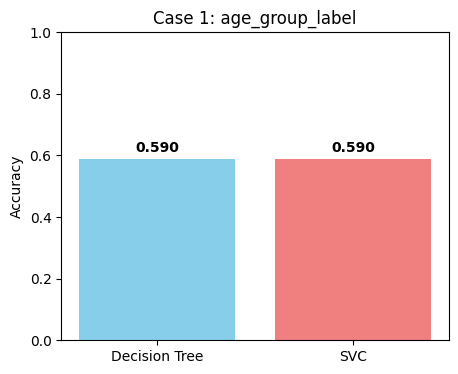

=== Case 2: bp_level_label ===
Decision Tree Accuracy: 0.590
Neural Network Accuracy: 0.590

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.58      0.85      0.69        33
     Disease       0.62      0.29      0.39        28

    accuracy                           0.59        61
   macro avg       0.60      0.57      0.54        61
weighted avg       0.60      0.59      0.55        61


Neural Network Classification Report:
              precision    recall  f1-score   support

  No Disease       0.58      0.85      0.69        33
     Disease       0.62      0.29      0.39        28

    accuracy                           0.59        61
   macro avg       0.60      0.57      0.54        61
weighted avg       0.60      0.59      0.55        61



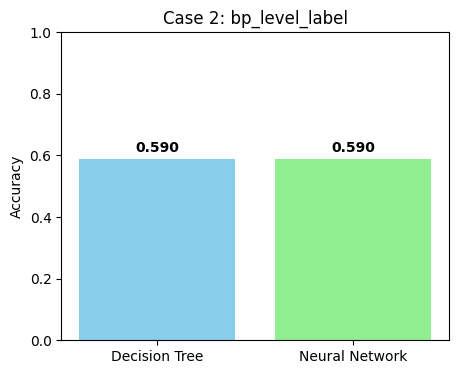

=== Case 3: chol ===
Decision Tree Accuracy: 0.639
Neural Network Accuracy: 0.541

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.63      0.79      0.70        33
     Disease       0.65      0.46      0.54        28

    accuracy                           0.64        61
   macro avg       0.64      0.63      0.62        61
weighted avg       0.64      0.64      0.63        61


Neural Network Classification Report:
              precision    recall  f1-score   support

  No Disease       0.54      1.00      0.70        33
     Disease       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



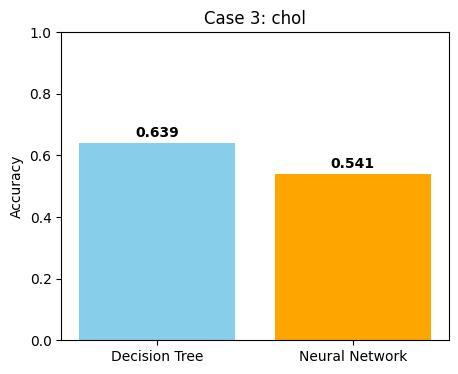

In [453]:
# Case 1: age_group_label
y_pred_svc1 = svc_case1.predict(X_test_case1)
accuracy_dt1 = accuracy_score(y_test_case1, y_pred_case1)
accuracy_alt1 = accuracy_score(y_test_case1, y_pred_svc1)

print("=== Case 1: age_group_label ===")
print(f"Decision Tree Accuracy: {accuracy_dt1:.3f}")
print(f"SVC Accuracy: {accuracy_alt1:.3f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_case1, y_pred_case1, target_names=['No Disease', 'Disease'], zero_division=0))
print("\nSVC Classification Report:")
print(classification_report(y_test_case1, y_pred_svc1, target_names=['No Disease', 'Disease'], zero_division=0))

# Bar chart
plt.figure(figsize=(5,4))
plt.bar(['Decision Tree','SVC'], [accuracy_dt1, accuracy_alt1], color=['skyblue','lightcoral'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Case 1: age_group_label')
for i, acc in enumerate([accuracy_dt1, accuracy_alt1]):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', fontweight='bold')
plt.show()

# Case 2: bp_level_label
y_pred_nn2 = nn_case2.predict(X_test_case2)
accuracy_dt2 = accuracy_score(y_test_case2, y_pred_case2)
accuracy_alt2 = accuracy_score(y_test_case2, y_pred_nn2)

print("=== Case 2: bp_level_label ===")
print(f"Decision Tree Accuracy: {accuracy_dt2:.3f}")
print(f"Neural Network Accuracy: {accuracy_alt2:.3f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_case2, y_pred_case2, target_names=['No Disease', 'Disease'], zero_division=0))
print("\nNeural Network Classification Report:")
print(classification_report(y_test_case2, y_pred_nn2, target_names=['No Disease', 'Disease'], zero_division=0))

# Bar chart
plt.figure(figsize=(5,4))
plt.bar(['Decision Tree','Neural Network'], [accuracy_dt2, accuracy_alt2], color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Case 2: bp_level_label')
for i, acc in enumerate([accuracy_dt2, accuracy_alt2]):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', fontweight='bold')
plt.show()

# Case 3: chol
y_pred_nn3 = nn_case3.predict(X_test_case3)
accuracy_dt3 = accuracy_score(y_test_case3, y_pred_case3)
accuracy_alt3 = accuracy_score(y_test_case3, y_pred_nn3)

print("=== Case 3: chol ===")
print(f"Decision Tree Accuracy: {accuracy_dt3:.3f}")
print(f"Neural Network Accuracy: {accuracy_alt3:.3f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_case3, y_pred_case3, target_names=['No Disease', 'Disease'], zero_division=0))
print("\nNeural Network Classification Report:")
print(classification_report(y_test_case3, y_pred_nn3, target_names=['No Disease', 'Disease'], zero_division=0))

# Bar chart
plt.figure(figsize=(5,4))
plt.bar(['Decision Tree','Neural Network'], [accuracy_dt3, accuracy_alt3], color=['skyblue','orange'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Case 3: chol')
for i, acc in enumerate([accuracy_dt3, accuracy_alt3]):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', fontweight='bold')
plt.show()

**Reflection 5**

Across the three cases, the Decision Tree generally performed better or at least as well as the alternative models (SVC or Neural Network) for this dataset. Specifically:

* Case 1 (age_group_label): Both Decision Tree and SVC achieved the same accuracy (~0.59). Age alone is a coarse predictor, so both models struggled to separate classes effectively.

* Case 2 (bp_level_label): Decision Tree and Neural Network also had similar accuracy (~0.59). Blood pressure alone provides limited discriminative power when used as a single feature.

* Case 3 (cholesterol): Decision Tree outperformed the Neural Network (0.64 vs. 0.54). The Neural Network predicted all patients as “No Disease,” leading to poor recall for the disease class.

Why the Decision Tree might be more effective in this case:

1. Simplicity of the features: Each case used a single feature (age group, blood pressure level, or cholesterol). Decision Trees handle single-feature splits naturally, while more complex models like Neural Networks or SVC may overcomplicate a simple relationship.

2. Non-linear thresholds: Decision Trees can easily split the data at meaningful thresholds (e.g., cholesterol > 240), which aligns with medical risk factors.

3. Small dataset: The dataset has only 303 records. Simpler models like Decision Trees are less prone to overfitting compared to Neural Networks or SVC, which generally require more data to generalize well.

Conclusion:
For single-feature heart disease prediction, Decision Trees provide interpretable rules and robust performance, making them well-suited for this type of clinical dataset.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings
We tested Decision Tree, SVC, and Neural Network models using age group, blood pressure level, and cholesterol individually to predict heart disease. Cholesterol was the strongest predictor, followed by blood pressure, while age group alone was less helpful. Alternative models didn’t perform much better than Decision Trees for single features. Combining multiple features would probably make the model more accurate since each one captures different parts of heart disease risk.

### 6.2 Challenges Faced
Some challenges included converting the original multi-class target into a simple binary outcome while keeping it meaningful, handling missing values for features like ca and thal, and dealing with low performance when using only one feature, especially age. Neural Network predictions for cholesterol also had issues because of class imbalance, which caused warnings for precision and recall.

### 6.3 If I Had More Time
If I had more time, I would build a model using multiple features together, like age, blood pressure, and cholesterol, to improve accuracy. I would also use cross-validation to make sure the evaluation metrics are reliable and robust.

**Reflection 6: What Did I Learn from This Project?**

Looking at individual features can show some trends, but combining several features usually makes the model more accurate. Cleaning the data and creating new features really helps the model understand the patterns better. It also helped to think about the medical side of things, like why age, blood pressure, and cholesterol matter. Different models work better for different types of data, so trying a few is important. Overall, I learned that exploring the data, preprocessing carefully, and comparing models are key to building a good predictive model.